Epoch 1/10000, Loss: 0.14104153906599773
Epoch 101/10000, Loss: 0.04427395111140281
Epoch 201/10000, Loss: 0.042426219461560326
Epoch 301/10000, Loss: 0.03954399659592696
Epoch 401/10000, Loss: 0.03546581098981766
Epoch 501/10000, Loss: 0.030936940025893474
Epoch 601/10000, Loss: 0.026984228070242307
Epoch 701/10000, Loss: 0.023843604834249254
Epoch 801/10000, Loss: 0.02139861221211456
Epoch 901/10000, Loss: 0.0194781243477378
Epoch 1001/10000, Loss: 0.01791636854498928
Epoch 1101/10000, Loss: 0.016619539709455136
Epoch 1201/10000, Loss: 0.015522808415964328
Epoch 1301/10000, Loss: 0.014573224041813148
Epoch 1401/10000, Loss: 0.013741880700234261
Epoch 1501/10000, Loss: 0.013006302469931091
Epoch 1601/10000, Loss: 0.012349647108599307
Epoch 1701/10000, Loss: 0.011761001961306963
Epoch 1801/10000, Loss: 0.011227472681286136
Epoch 1901/10000, Loss: 0.010743687651550902
Epoch 2001/10000, Loss: 0.010301299850025349
Epoch 2101/10000, Loss: 0.009894036734627104
Epoch 2201/10000, Loss: 0.0095

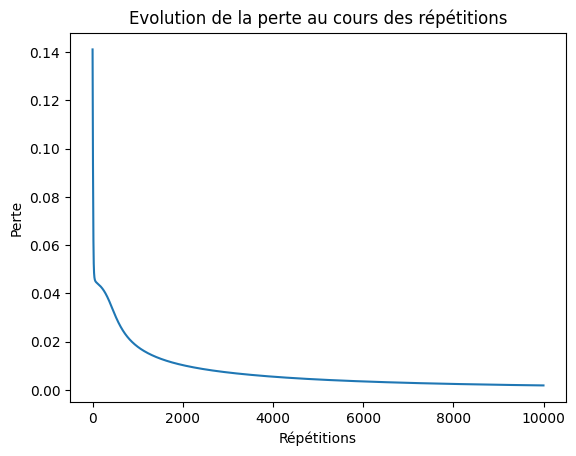

Précision du modèle sur l'ensemble de test : 87.62%
Précision pour le chiffre 0: 88.46%
Précision pour le chiffre 1: 85.71%
Précision pour le chiffre 2: 88.24%
Précision pour le chiffre 3: 75.00%
Précision pour le chiffre 4: 88.89%
Précision pour le chiffre 5: 87.50%
Précision pour le chiffre 6: 100.00%
Précision pour le chiffre 7: 95.24%
Précision pour le chiffre 8: 87.50%
Précision pour le chiffre 9: 85.71%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
class CoucheNeuronale:
    def __init__(self, nombre_entrees, nombre_neurones, activation):
        if activation == 'relu':
            # Initialisation de He
            self.W = np.random.randn(nombre_neurones, nombre_entrees) * np.sqrt(2. / nombre_entrees)
        else:
            # Initialisation standard pour sigmoid
            self.W = np.random.randn(nombre_neurones, nombre_entrees) * np.sqrt(1. / nombre_entrees)
        self.B = np.zeros((nombre_neurones, 1))
        self.activation = activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.Z = np.dot(self.W, X) + self.B
        if self.activation == 'sigmoid':
            self.A = self.sigmoid(self.Z)
        elif self.activation == 'relu':
            self.A = self.relu(self.Z)
        return self.A

    def backward(self, X, dA_prec, learning_rate):
        m = X.shape[1]
        if self.activation == 'sigmoid':
            dZ = dA_prec * self.sigmoid(self.Z) * (1 - self.sigmoid(self.Z))
        elif self.activation == 'relu':
            dZ = dA_prec * (self.Z > 0).astype(int)

        dW = np.dot(dZ, X.T) / m
        dB = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prec = np.dot(self.W.T, dZ)  # Gradient par rapport à l'entrée

        self.W -= learning_rate * dW
        self.B -= learning_rate * dB

        return dA_prec

def charger_images(base_path, test_size=0.2):
    images = []
    labels = []
    
    for chiffre in range(10):  # Pour chaque chiffre de 0 à 9
        dossier_chiffre = os.path.join(base_path, str(chiffre))  # Chemin du dossier pour le chiffre
        for i in range(101):  # Pour chaque image de 0.jpg à 100.jpg
            image_path = os.path.join(dossier_chiffre, f"{i}.jpg")
            if os.path.exists(image_path):
                with Image.open(image_path) as img:
                    img_array = np.asarray(img)
                    img_array = img_array / 255.0  # Normalisation
                    images.append(img_array.flatten())  # Aplatir l'image et ajouter au tableau
                    labels.append(chiffre)  # Ajouter l'étiquette correspondant au chiffre
    
    images = np.array(images)
    labels = np.array(labels)

    # Mélanger les données
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]
    
    # Diviser les données en ensembles d'entraînement et de test
    split_idx = int(images.shape[0] * (1 - test_size))
    X_train, X_test = images[:split_idx], images[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]
    
    return X_train, X_test, y_train, y_test


chemin_dataset = "C:/Users/cedri/Documents/Machine_learning/chiffres/10x10 dataset/"
X_train, X_test, y_train, y_test = charger_images(chemin_dataset, test_size=0.2)

# Convertir les étiquettes en vecteurs one-hot
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels].T

Y_train = one_hot_encode(y_train)
Y_test = one_hot_encode(y_test)
X_train = X_train
X_test = X_test

def entrainer_reseau(X_train, Y_train, couche1, couche2, epochs, learning_rate):
    loss_history = []
    
    for epoch in range(epochs):
        # Propagation avant
        A1 = couche1.forward(X_train)
        A2 = couche2.forward(A1)
        
        # Calcul de la perte (erreur quadratique moyenne)
        loss = np.mean(0.5 * (A2 - Y_train) ** 2)
        loss_history.append(loss)
        
        # Rétropropagation
        # Note : dA2 pour la dernière couche se calcule différemment selon la fonction de perte
        dA2 = A2 - Y_train
        dA1 = couche2.backward(A1, dA2, learning_rate)
        dA0 = couche1.backward(X_train, dA1, learning_rate)  # dA0 n'est pas utilisé ici
        
        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")
    
    return loss_history
couche1 = CoucheNeuronale(100, 32, 'relu')
couche2 = CoucheNeuronale(32, 10, 'sigmoid')
loss_history=entrainer_reseau(X_train.T, Y_train, couche1, couche2, epochs=10000, learning_rate=0.1)

plt.plot(loss_history)
plt.title('Evolution de la perte au cours des répétitions')
plt.xlabel('Répétitions')
plt.ylabel('Perte')
plt.show()

def evaluer_modele(X_test, Y_test, couche1, couche2):
    # Propagation avant sur l'ensemble de test
    A1 = couche1.forward(X_test)
    A2 = couche2.forward(A1)
    
    # Prédictions : récupérer l'indice de la plus grande probabilité pour chaque exemple
    predictions = np.argmax(A2, axis=0)
    labels_verites = np.argmax(Y_test, axis=0)  # Assurez-vous que Y_test est dans le format correct
    
    # Calcul de la précision
    precision = np.mean(predictions == labels_verites)
    return precision

# Évaluation de la précision du modèle sur l'ensemble de test
precision = evaluer_modele(X_test.T, Y_test, couche1, couche2)
print(f"Précision du modèle sur l'ensemble de test : {precision * 100:.2f}%")

def precision_par_chiffre(X_test, Y_test, couche1, couche2):
    A1 = couche1.forward(X_test)
    A2 = couche2.forward(A1)
    
    predictions = np.argmax(A2, axis=0)
    labels_verites = np.argmax(Y_test, axis=0)
    
    precision_par_classe = np.zeros(10)  # Pour stocker la précision de chaque classe
    
    for classe in range(10):  # Pour chaque classe de chiffre de 0 à 9
        indices_classe = labels_verites == classe  # Trouver où les vraies étiquettes sont égales à la classe
        predictions_classe = predictions[indices_classe]  # Filtrer les prédictions pour ces indices
        labels_verites_classe = labels_verites[indices_classe]  # Filtrer les vraies étiquettes pour ces indices
        
        # Calculer la précision pour cette classe
        precision_classe = np.mean(predictions_classe == labels_verites_classe)
        precision_par_classe[classe] = precision_classe
    
    return precision_par_classe

# Calculer la précision par chiffre sur l'ensemble de test
precision_chiffre = precision_par_chiffre(X_test.T, Y_test, couche1, couche2)

# Afficher la précision pour chaque chiffre
for chiffre in range(10):
    print(f"Précision pour le chiffre {chiffre}: {precision_chiffre[chiffre] * 100:.2f}%")
